In [125]:
import numpy as np
import matplotlib.pyplot as plt

# from LabToolbox.utils import PrintResult, histogram, analyze_residuals
# from LabToolbox.fit import lin_fit, model_fit
# from LabToolbox.uncertainty import propagate_uncertainty

import LabToolbox as lab

%config InlineBackend.figure_formats = ['svg'] # <-- Qualità 'svg' dei plot.

`PrintResult`

In [126]:
x = 1.264382
sigmax = 0.357

# The sample data represent the measured current (in amperes) in a circuit along with the associated uncertainty.
# However, these are not correctly formatted.

In [127]:
lab.PrintResult(x, sigmax, name = "Current", unit= "A")

# This function allows you to print the correctly formatted value (with sigma having two significant digits).
# The relative uncertainty of the measurement is shown in square brackets.
# Further descriptions of the `histogram` variables are available by hovering the cursor over the function itself.

Current = (1.26 ± 0.36) A [28.57%]


In [128]:
lab.PrintResult(1785762, 0.23, unit = "fm")
lab.PrintResult(1785762, 1253)

(1785762.00 ± 0.23) fm [0.00%]
1785800 ± 1300 [0.07%]


`histogram`

In [129]:
np.random.seed(0)
x = np.random.normal(100, 7, size = (50))

# The generated data can represent, for example, the mass values of an apple (in grams) measured with a scale.
# This type of measurements follows a Gaussian distribution.

Mean value: 101 g
Standard deviation: 8.0 g
Skewness: -0.13
Kurtosis: -0.59
p-value: 88%

The data are consistent with a normal distribution.


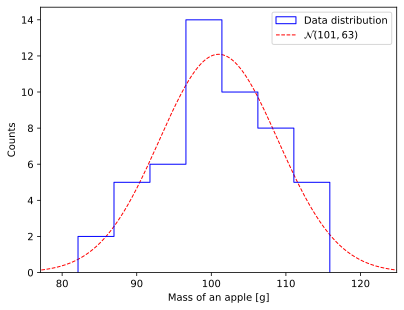

In [130]:
_, _, _, _, _ = lab.stats.hist(x, x.std(), unit = "g", label = "Mass of an apple")

# This function constructs a histogram of occurrences for a given variable.
# The number of bins for the histogram is automatically calculated by the function.
# A Gaussian with parameter μ = x.mean() and σ = sigmax will be overlaid on the histogram.
# Further descriptions of the `histogram` variables are available by hovering the cursor over the function itself.

`analyze_residuals`

Mean value: 0.1
Standard deviation: 1.5
Skewness: 0.03
Kurtosis: -2.26
p-value: 90%
Durbin-Watson statistic: 1.725

Residuals are consistent with a normal distribution.
Residuals do not show significant autocorrelation.


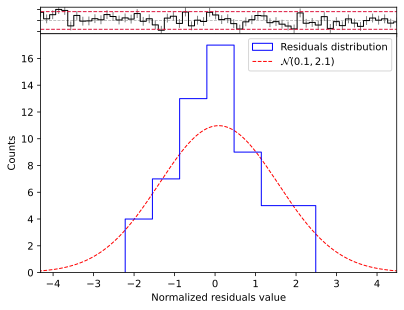

In [131]:
# Example data generation
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 60)  # 20 equally spaced points between 0 and 10
y = 2.5 * x + 1.5 + np.random.normal(0, 2, size=x.shape)  # sample data

np.random.seed(1)
sy = np.random.uniform(1.5, 2.5, size=len(y))  # Uncertainties between ±1.5 and ±2.5

_, _, _, _, _, _ = lab.stats.analyze_residuals(y, 2.5*x + 1.5, sy, norm = True)

`lin_fit`

In [132]:
# Example data generation
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 20)  # 20 equally spaced points between 0 and 10
y = 2.5 * x + 1.5 + np.random.normal(0, 2, size=x.shape)  # sample data

np.random.seed(1)
sy = np.random.uniform(1.5, 2.5, size=len(y))  # Uncertainties between ±1.5 and ±2.5

χ²/dof = 0.85
p-value = 64%
80% of the residuals lie within ±2σ of zero.


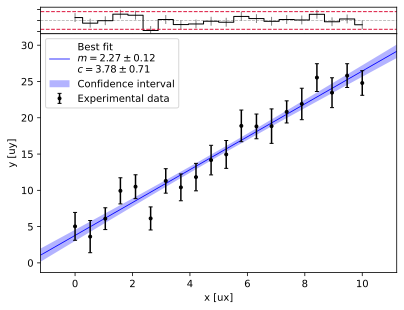

In [133]:
m, c, sigma_m, sigma_c, chi2_red, p_value = lab.fit.lin_fit(x = x, y = y, y_err = sy, x_err = None, fitmodel = "wls", residuals = True)

# This function performs a linear fit on y(x). If `residuals = True`, a panel with normalized residuals appears above the fit.
# The black line shows the normalized residual values, while the grey band indicates a ±1 error range.
# The dashed red lines represent the confidence interval [-2, +2].
# Further descriptions of the `lin_fit` variables are available by hovering the cursor over the function itself.

`model_fit`

In [134]:
# Example data generation for model_fit
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 20)  # 20 equally spaced points between 0 and 10
y = np.sin(2*x) + 1.5 + np.random.normal(0, 2, size=x.shape)  # sample data

np.random.seed(1)
sy = np.random.uniform(1, 2, size=len(y))  # Uncertainties between ±1 and ±2

Parameter 1 = (1.150 +/- 0.083) [7.18%]
Parameter 2 = (2.66 +/- 0.30) [11.20%]

χ²/dof = 1.53
p-value = 7.00%

70% of the residuals lie within ±2σ of zero.


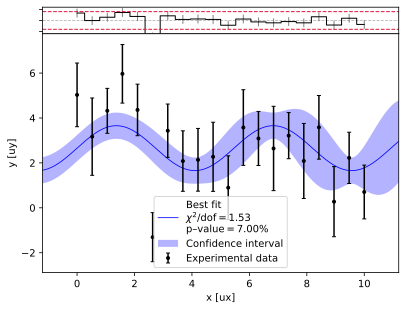

In [135]:
def model_function(x, a, b):
    return np.sin(a * x) + b

# Defined the model function for fitting the data.
# 'a' and 'b' are free parameters and should follow the independent variable in the function signature.
# The `model_fit` function estimates the parameters 'a' and 'b'.

popt, perr, chi2_red, p_value = lab.fit.model_fit(x, y, sy, f = model_function, p0=[1, 2], residuals=True, norm=True)

# p0 is a list of initial guesses for the model parameters.
# The order of parameters in `p0` matches the order defined in `model_function`'s arguments.
# Further descriptions of the `model_fit` variables are available by hovering the cursor over the function itself.

`posterior`

100%|██████████| 5000/5000 [00:00<00:00, 6045.26it/s]


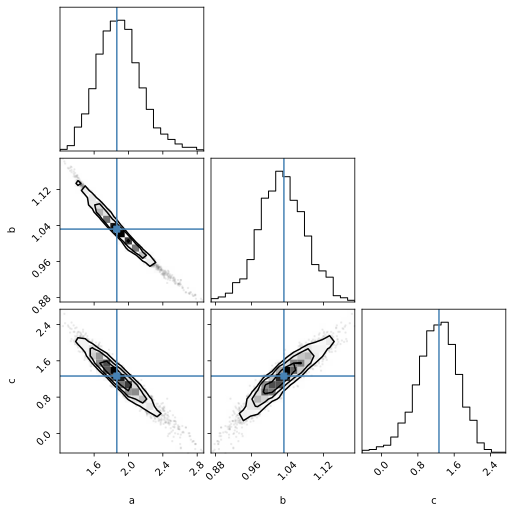

Posterior medians and 1σ intervals:
-----------------------------------
a = 1.88465 (+0.25374, -0.24046)
b = 1.02741 (+0.05225, -0.04851)
c = 1.24433 (+0.42418, -0.45815)

Maximum Likelihood Estimation (MLE):
-------------------------------------
a = 1.87712
b = 1.02890
c = 1.24704


In [136]:
# Modello di esempio: y = a * x + b
def model(x, a, b, c):
    return a * x**b + c

# Dati simulati
x = np.linspace(1, 10, 50)
true_params = [2.0, 1.0, 1.1]
y_true = model(x, *true_params)
noise = 0.5
y_obs = y_true + np.random.normal(0, noise, size=x.size)
sy = np.full_like(y_obs, noise)

# Esegui fit bayesiano
samples, mle = lab.stats.posterior(x, y_obs, sy, model, p0=[1, 0, 1], names=['a', 'b', 'c'], prior_bounds=None)

`propagate`

In [137]:
np.random.seed(0)
h = np.random.normal(5, 0.25, size=10)
r = np.random.normal(7, 0.20, size=10)

np.random.seed(1)
sh = np.random.uniform(0.15, 0.25, size=len(h))  # Uncertainties between ±0.15 and ±0.25
sr = np.random.uniform(0.1, 0.3, size=len(h))    # Uncertainties between ±0.1 and ±0.3

V = np.pi * r**2 * h # measured volume of the cylinder

# We measured two variables (e.g., cylinder height and radius in cm) 10 times each, with uncertainties sh and sr respectively.
# The variable V is the cylinder volume (in cm^3).
# To propagate the uncertainties of h and r onto V, use the `propagate_uncertainty` function.

def volume(height, radius):
    return np.pi * radius**2 * height

# Defined the function to compute volume from radius and height.

V_value, sigma_V, _ = lab.uncertainty.propagate(func=lambda h, r : np.pi * r**2 * h, x_val =[h, r], x_err =[sh, sr], params=None)

# Further descriptions of the `propagate` variables are available by hovering the cursor over the function itself.

for i in range(len(V_value)):
    lab.PrintResult(V_value[i], sigma_V[i], name=f"Volume (measurement {i+1})", unit="cm^3")

Volume (measurement 1) = (844 ± 53) cm^3 [6.28%]
Volume (measurement 2) = (852 ± 67) cm^3 [7.86%]
Volume (measurement 3) = (843 ± 41) cm^3 [4.86%]
Volume (measurement 4) = (862 ± 73) cm^3 [8.47%]
Volume (measurement 5) = (863 ± 37) cm^3 [4.29%]
Volume (measurement 6) = (746 ± 55) cm^3 [7.37%]
Volume (measurement 7) = (877 ± 52) cm^3 [5.93%]
Volume (measurement 8) = (755 ± 54) cm^3 [7.15%]
Volume (measurement 9) = (779 ± 41) cm^3 [5.26%]
Volume (measurement 10) = (748 ± 43) cm^3 [5.75%]


`harmonic`

In [138]:
# Genera un segnale composto da tre armoniche
t = np.linspace(0, 1, 1000, endpoint=False)
y = (2 * np.sin(2 * np.pi * 5 * t) + 
     1.5 * np.sin(2 * np.pi * 10 * t + np.pi / 4) + 
     1.0 * np.sin(2 * np.pi * 20 * t + np.pi / 2))

# Estrai le componenti armoniche
harmonics = lab.signals.harmonic(t, y, prominence=0.05)

# Stampa le componenti trovate
print("Harmonic components:")
for h in harmonics:
    print(f"Freq = {h['frequency']:.2f} Hz, Amp = {h['amplitude']:.2f}, Phase = {h['phase']:.2f} rad")

Harmonic components:
Freq = 5.00 Hz, Amp = 2.00, Phase = -1.57 rad
Freq = 10.00 Hz, Amp = 1.50, Phase = -0.79 rad
Freq = 20.00 Hz, Amp = 1.00, Phase = -0.00 rad


`decompose`

Text(0, 0.5, 'Amplitude')

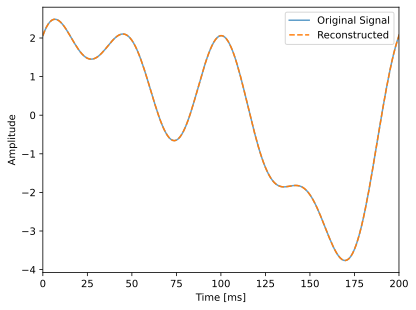

In [139]:
# Frequenze che si vogliono stimare
freqs_to_extract = [5, 10, 20]

# Decomposizione
components = lab.signals.decompose(t, y, freqs_to_extract)

# Visualizzazione della somma ricostruita
reconstructed = np.zeros_like(y)
for c in components:
    reconstructed += c['amplitude'] * np.sin(2 * np.pi * c['frequency'] * t + c['phase'])

# Plot confronto tra originale e ricostruito
plt.plot(t*1000, y, label='Original Signal', alpha=0.7)
plt.plot(t*1000, reconstructed, label='Reconstructed', linestyle='--')
plt.xlim(0, 0.2*1000)
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')

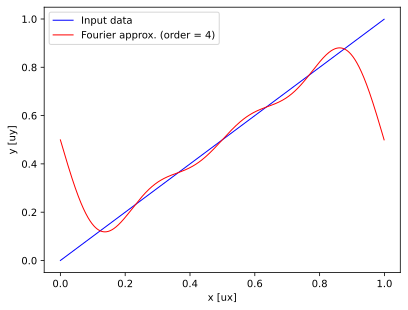

In [140]:
_, _, _, _ = lab.signals.dfs(t, t, 4)

`convert`

In [141]:
lab.convert(22.3, "eV/nm", "meV/fm")

Input:  22.3 [eV/nm]
Output: 0.0223 [meV/fm]


np.float64(0.0223)

In [142]:
lab.convert(1e-2, "rad", "arcsec")

Input:  0.01 [rad]
Output: 2062.648062470964 [arcsec]


np.float64(2062.648062470964)